In [1]:
import pandas as pd
import numpy as np
from math import *
import matplotlib.pyplot as plt
import matplotlib
import matplotlib
import scipy.stats
import tools

In [2]:
cancer = 'stomach'

In [3]:
genes = list(pd.read_table('data/'+cancer+'/mmr_mutation.txt')['COMMON'])
df1 = tools.load_data('data/'+cancer+'/mrr_methylation.txt', cat='meth')
df2 = tools.load_ces2('data/'+cancer+'/ces_expr2.txt')
df3 = tools.load_data('data/'+cancer+'/mmr_expr.txt', cat='expr')
df4 = tools.load_data('data/'+cancer+'/mmr_mutation.txt', cat='mut')
df5 = tools.load_mutation('data/'+cancer+'/cna_mutation.txt')

In [4]:
df = df5.merge(df1, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df2, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df3, how='outer', left_on='Sample ID', right_index=True)
df = df.merge(df4, how='outer', left_on='Sample ID', right_index=True)
df.head()

,Sample ID,Mutation Count,CNA,MLH1_meth,MLH3_meth,MSH2_meth,MSH3_meth,MSH6_meth,PCNA_meth,PMS2_meth,...,PMS2_expr,RFC1_expr,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut
0,TCGA-BR-6452-01,6545.0,0.050651,0.48308,0.042466,0.0222332,0.0871269,0.0232892,0.0351302,0.0213428,...,-0.0119,-0.1223,NaN,M181I,NaN,NaN,NaN,NaN,NaN,V976A
1,TCGA-BR-6453-01,165.0,0.049998,0.0218543,0.0565447,0.0195032,0.0833771,0.0199644,0.0489193,0.0275883,...,-0.5476,-0.9475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TCGA-BR-6454-01,123.0,0.181488,0.019822,0.0490996,0.0166467,0.0768036,0.0211339,0.0418918,0.0199929,...,-0.3026,-2.0006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TCGA-BR-6455-01,77.0,0.117506,0.0229177,0.0517937,0.0169772,0.0921804,0.0194734,0.0489449,0.0217387,...,-0.0281,-0.1027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TCGA-BR-6456-01,35.0,0.386722,0.0221793,0.0509518,0.0239083,0.0884377,0.0239651,0.041369,0.0157891,...,0.0939,-1.4068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# MSI status in function of gene expression and mutation

In [5]:
df = tools.get_msi_status(df, (-1.5,-1), genes_full=['MSH2','MLH1'], genes_part=['MSH6','MSH3','PMS2'])
df.head()

,Sample ID,Mutation Count,CNA,MLH1_meth,MLH3_meth,MSH2_meth,MSH3_meth,MSH6_meth,PCNA_meth,PMS2_meth,...,MLH1_mut,MLH3_mut,MSH2_mut,MSH3_mut,MSH6_mut,PCNA_mut,PMS2_mut,RFC1_mut,msi_status,msi_deficiency
0,TCGA-BR-6452-01,6545.0,0.050651,0.48308,0.042466,0.0222332,0.0871269,0.0232892,0.0351302,0.0213428,...,NaN,M181I,NaN,NaN,NaN,NaN,NaN,V976A,1.00,[MLH1]
1,TCGA-BR-6453-01,165.0,0.049998,0.0218543,0.0565447,0.0195032,0.0833771,0.0199644,0.0489193,0.0275883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,[]
2,TCGA-BR-6454-01,123.0,0.181488,0.019822,0.0490996,0.0166467,0.0768036,0.0211339,0.0418918,0.0199929,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,[]
3,TCGA-BR-6455-01,77.0,0.117506,0.0229177,0.0517937,0.0169772,0.0921804,0.0194734,0.0489449,0.0217387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,[]
4,TCGA-BR-6456-01,35.0,0.386722,0.0221793,0.0509518,0.0239083,0.0884377,0.0239651,0.041369,0.0157891,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.25,[]


In [6]:
msi = df[df['msi_status']>=0.75]
print(str(len(msi)/float(len(df))*100) + '% of tumors are presumed MSI tumors')
print('Usually 15% of colorectal cancers are MMR deficient.')
print(str(float(np.sum(msi['Mutation Count']>400))/float(len(msi))*100) + '% of presumed MSI tumors have more than 400 mutations')
print(str(float(np.sum(msi['Mutation Count']>400))*100./len(df[df['Mutation Count']>400]))+'% of tumors with more than 400 mutations are presumably MSI.')
print(str(float(np.sum(df['msi_status']==0.75))*100./len(msi))+'% of tumors are MSI because they have 2 underexpressed genes.')

12.681912681912683% of tumors are presumed MSI tumors
Usually 15% of colorectal cancers are MMR deficient.
75.40983606557377% of presumed MSI tumors have more than 400 mutations
59.74025974025974% of tumors with more than 400 mutations are presumably MSI.
0.0% of tumors are MSI because they have 2 underexpressed genes.


# CES, Mutations and MRR status

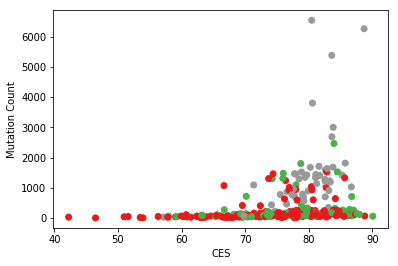

In [7]:
plt.scatter(df['ces'],df['Mutation Count'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylabel('Mutation Count')
plt.show()

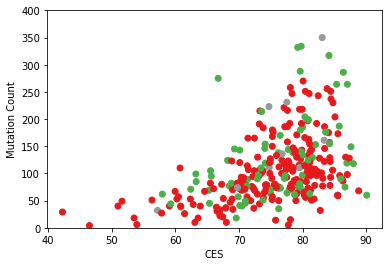

In [8]:
plt.scatter(df['ces'],df['Mutation Count'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylim(0,400)
plt.ylabel('Mutation Count')
plt.show()

In [9]:
print('Spearman Correlation P-value between CES and mutation for:')
print('MSS tumors')
print(scipy.stats.spearmanr(df[df['msi_status']==0]['ces'], df[df['msi_status']==0]['Mutation Count']).pvalue)
print('MSI tumors')
print(scipy.stats.spearmanr(df[df['msi_status']==1]['ces'], df[df['msi_status']==1]['Mutation Count']).pvalue)
print('All tumors')
print(scipy.stats.spearmanr(df['ces'], df['Mutation Count']).pvalue)

Spearman Correlation P-value between CES and mutation for:
MSS tumors
nan
MSI tumors
nan
All tumors
nan


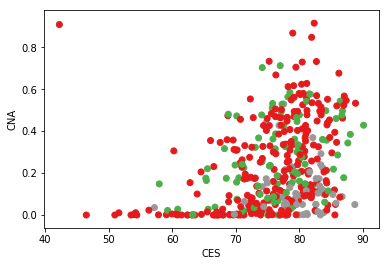

In [10]:
plt.scatter(df['ces'],df['CNA'],c=df['msi_status'],cmap=plt.cm.Set1,marker='o')
plt.xlabel('CES')
plt.ylabel('CNA')
plt.show()

/media/ariane/DATA/Ariane Lozac'hmeur/Documents/Berkeley/Capstone/code/tools.py:75: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hold(True)
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:4269: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/usr/local/lib/python3.5/dist-packages/matplotlib/cbook.py:2066: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.com

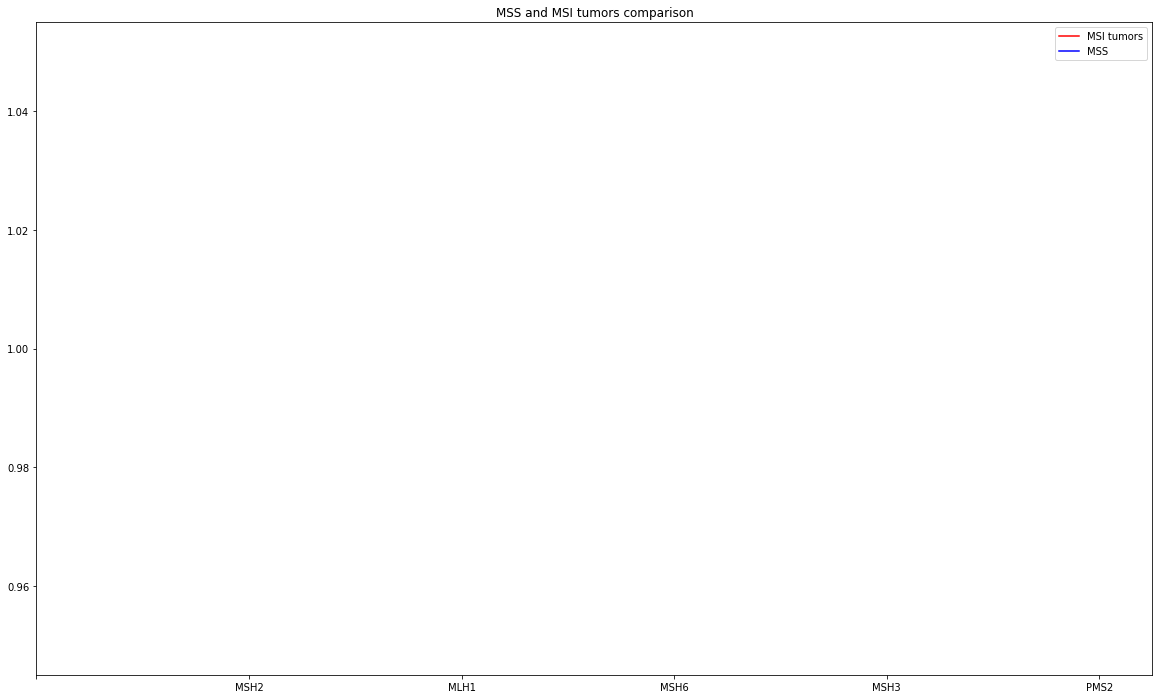

In [11]:
tools.boxplotcomp(df, genes = ['MSH2','MLH1','MSH6','MSH3','PMS2'])
# for g in ['MSH2','MLH1']:
#     tools.boxplotcomp(df, g, genes = ['MSH2','MLH1'])